#Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import altair as alt
import numpy as np
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
from tensorflow.keras.utils import plot_model

import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(10,10)})
print('imports ok')

imports ok


#Load Dataset

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
df = pd.read_csv('/content/gdrive/MyDrive/MaCADS3/S2CV/Week08/TestDataset_080621_7June.csv')
pd.set_option('display.max_columns', None)
#cleanData = data.loc[:,'hoys1':'RotAngle']
#print(df.to_string()) 
print(df)

      hoys  Bwidth  Blength  Bheight  f1  f2  f3  f4  f5  f6  f7  f8  f9  f10  \
0     4382      40       17       67   0   0   0   0   0   0   0   0   0    0   
1     6324       1        1        1   1   1   1   1   0   0   0   1   1    1   
2     6324       1        1        1   1   1   1   1   0   0   0   1   1    1   
3     6324       1        1        1   1   1   1   1   0   0   0   1   1    1   
4     6324       1        1        1   1   1   1   1   0   0   0   1   1    1   
...    ...     ...      ...      ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...   
1505  5697      41       18       14   0   1   1   1   1   0   0   0   0    0   
1506  5365      24       28       87   1   1   1   0   0   0   0   1   1    1   
1507  5289      16       28       39   0   0   0   0   0   0   0   0   0    0   
1508  4883      15       10       49   0   0   1   1   0   0   0   0   0    0   
1509  5221      39       50      148   1   1   1   0   0   0   0   1   1    1   

      f11  f12  f13  f14  f

In [4]:
#Remove null values from dataset
df_clean = df.dropna(how = "any")
df_clean.info()
df_clean.reset_index(inplace=True, drop = True)
df_clean.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1510 entries, 0 to 1509
Columns: 104 entries, hoys to f100
dtypes: int64(104)
memory usage: 1.2 MB


,hoys,Bwidth,Blength,Bheight,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99,f100
0,4382,40,17,67,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,6324,1,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,0,0,0,1,0,1
2,6324,1,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,0,0,0,1,1,0
3,6324,1,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,0,0,0,1,1,1
4,6324,1,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,0,0,0,1,1,0


drop columns with similar values 


In [5]:
#for col in df.columns:
  #if len(df[col].unique()) ==1:
    #df.drop([col], axis=1, inplace=True)
#print(df)

In [6]:
# Check data types
df.info()
# Print the first 5 rows
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1510 entries, 0 to 1509
Columns: 104 entries, hoys to f100
dtypes: int64(104)
memory usage: 1.2 MB


,hoys,Bwidth,Blength,Bheight,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99,f100
0,4382,40,17,67,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,6324,1,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,0,0,0,1,0,1
2,6324,1,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,0,0,0,1,1,0
3,6324,1,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,0,0,0,1,1,1
4,6324,1,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,0,0,0,1,1,0


In [7]:
# Descriptive statistics
df.describe()

,hoys,Bwidth,Blength,Bheight,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99,f100
count,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000
mean,5105.453642,30.192053,36.739735,77.788079,0.301325,0.217219,0.207947,0.199338,0.169536,0.137086,0.163576,0.131788,0.099338,0.109934,0.048344,0.041060,0.085430,0.138411,0.169536,0.184106,0.197351,0.117219,0.048344,0.076821,0.084768,0.071523,0.114570,0.162914,0.153642,0.140397,0.127815,0.121192,0.023179,0.005298,0.160265,0.132450,0.156291,0.152980,0.164901,0.154305,0.161589,0.094702,0.011258,0.005298,0.209934,0.169536,0.182781,0.182781,0.225166,0.188079,0.166887,0.092715,0.021854,0.005298,0.213245,0.203311,0.236424,0.220530,0.213245,0.183444,0.150993,0.058940,0.009934,0.005298,0.268874,0.258278,0.249007,0.226490,0.211258,0.180132,0.153642,0.099338,0.011921,0.005298,0.325828,0.305298,0.309272,0.237086,0.209934,0.170861,0.121854,0.091391,0.033775,0.011258,0.370861,0.337748,0.337748,0.266225,0.209272,0.174834,0.158278,0.116556,0.019205,0.005298,0.338411,0.277483,0.298675,0.256291,0.217881,0.182119,0.145695,0.104636,0.046358,0.033113
std,857.145885,12.113017,16.467747,40.834196,0.458985,0.412489,0.405973,0.399635,0.375349,0.344052,0.370013,0.338372,0.299214,0.312911,0.214564,0.198494,0.279614,0.345445,0.375349,0.387699,0.398131,0.321787,0.214564,0.266396,0.278629,0.257782,0.318607,0.369409,0.360725,0.347514,0.333994,0.326458,0.150521,0.072618,0.366973,0.339092,0.363252,0.360088,0.371214,0.361360,0.368196,0.292900,0.105541,0.072618,0.407396,0.375349,0.386615,0.386615,0.417830,0.390905,0.372999,0.290129,0.146256,0.072618,0.409735,0.402595,0.425026,0.414741,0.409735,0.387158,0.358161,0.235591,0.099205,0.072618,0.443521,0.437833,0.432581,0.418698,0.408336,0.384425,0.360725,0.299214,0.108564,0.072618,0.468839,0.460686,0.462346,0.425436,0.407396,0.376512,0.327226,0.288259,0.180709,0.105541,0.483195,0.473099,0.473099,0.442130,0.406923,0.379951,0.365123,0.320997,0.137291,0.072618,0.473326,0.447905,0.457829,0.436729,0.412943,0.386071,0.352917,0.306185,0.210328,0.178990
min,3633.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0

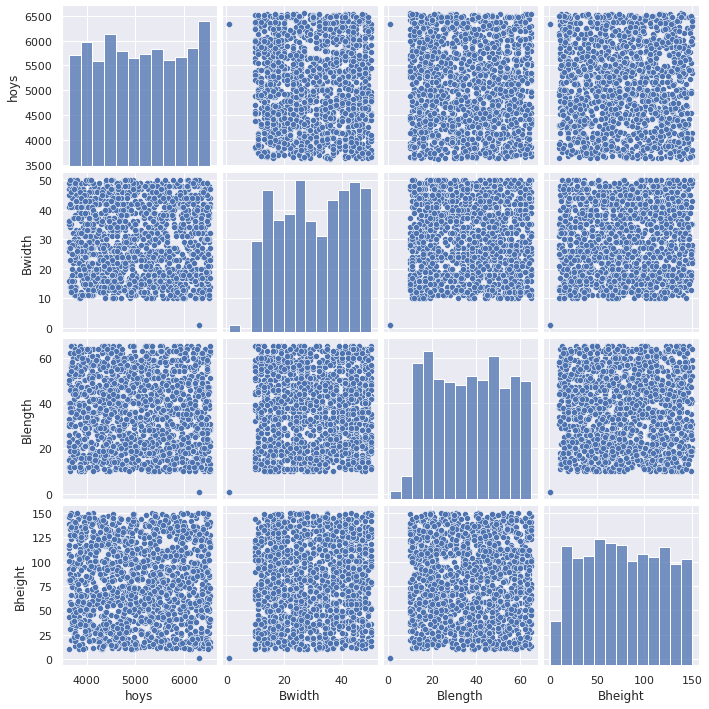

In [8]:
data_numerical = df[["hoys",	"Bwidth",	"Blength",	"Bheight"]]
sns.pairplot(data_numerical)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd3c6724b10>]],
      dtype=object)

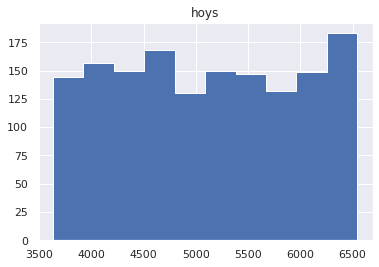

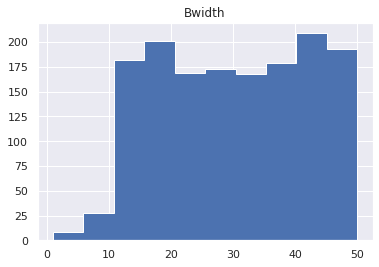

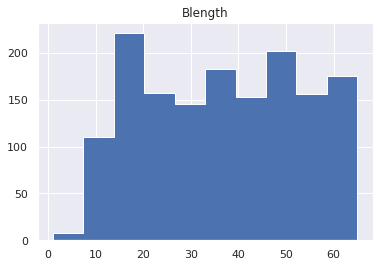

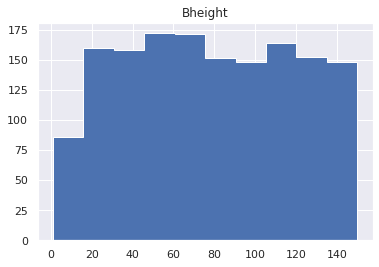

In [9]:
df.hist("hoys", histtype='stepfilled')
df.hist("Bwidth", histtype='stepfilled')
df.hist("Blength", histtype='stepfilled')
df.hist("Bheight", histtype='stepfilled')

#df.hist("Side_LengthA", histtype='stepfilled')
#df.hist("Side_LenghtB", histtype='stepfilled')
#df.hist("Width_A", histtype='stepfilled')
#df.hist("Width_B", histtype='stepfilled')
#df.hist("#Shadow_Hits", histtype='stepfilled')
#df_clean.hist(color='Steelblue')

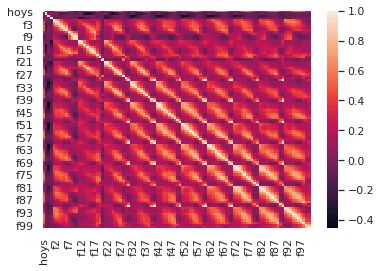

In [10]:
#Correlation Plot
sns.heatmap(df_clean.corr()) #0 = no correlation

#PCA

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
# Let's standard-scale our data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_clean)
data_scaled.shape

(1510, 104)

In [13]:
# What are mean and Sd now?
pd.DataFrame(data_scaled, columns=df_clean.columns).describe()

,hoys,Bwidth,Blength,Bheight,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99,f100
count,1.510000e+03,1.510000e+03,1.510000e+03,1.510000e+03,1.510000e+03,1.510000e+03,1.510000e+03,1.510000e+03,1.510000e+03,1.510000e+03,1.510000e+03,1.510000e+03,1.510000e+03,1.510000e+03,1.510000e+03,1.510000e+03,1.510000e+03,1.510000e+03,1.510000e+03,1.510000e+03,1.510000e+03,1.510000e+03,1.510000e+03,1.510000e+03,1.510000e+03,1.510000e+03,1.510000e+03,1.510000e+03,1.510000e+03,1.510000e+03,1.510000e+03,1.510000e+03,1.510000e+03,1.510000e+03,1.510000e+03,1.510000e+03,1.510000e+03,1.510000e+03,1.510000e+03,1.510000e+03,1.510000e+03,1.510000e+03,1.510000e+03,1.510000e+03,1.510000e+03,1.510000e+03,1.510000e+03,1.510000e+03,1.510000e+03,1.510000e+03,1.510000e+03,1.510000e+03,1.510000e+03,1.510000e+03,1.510000e+03,1.510000e+03,1.510000e+03,1.510000e+03,1.510000e+03,1.510000e+03,1.510000e+03,1.510000e+03,1.510000e+03,1.510000e+03,1.510000e+03,1.510000e+03,1.510000e+03,1.510000e+03,1.510000e+03,1.510000e+03,1.510000e+03,1.510000e+03,1.510000e+03,1.510000e+03,1.510000e+03,1.510000e+03,1.510000e+03,1.510000e+03,1.510000e+03,1.510000e+03,1.510000e+03,1.510000e+03,1.510000e+03,1.510000e+03,1.510000e+03,1.510000e+03,1.510000e+03,1.510000e+03,1.510000e+03,1.510000e+03,1.510000e+03,1.510000e+03,1.510000e+03,1.510000e+03,1.510000e+03,1.510000e+03,1.510000e+03,1.510000e+03,1.510000e+03,1.510000e+03,1.510000e+03,1.510000e+03,1.510000e+03,1.510000e+03
mean,-4.753372e-16,-1.423438e-16,-1.166102e-16,-1.357266e-16,2.064574e-16,1.155808e-16,3.152739e-16,1.244773e-16,9.124416e-17,1.531520e-16,3.129947e-16,8.470046e-17,-5.470238e-17,3.105683e-16,-1.484831e-16,-3.174429e-16,-2.582188e-16,-1.906496e-16,9.153826e-17,-3.007160e-17,-8.675915e-17,-5.529058e-17,-1.471597e-16,2.130011e-16,-9.337637e-18,-7.374528e-17,2.221181e-16,-3.525510e-17,8.477398e-17,-1.619749e-16,-8.977366e-17,-5.248929e-16,-1.245839e-15,6.958746e-16,-1.340355e-16,5.279074e-17,-1.328959e-16,4.918803e-17,3.674029e-16,1.544019e-18,-1.347708e-16,4.743814e-16,1.301222e-15,6.958746e-16,-3.135093e-16,1.602471e-16,1.242567e-17,1.706508e-16,-8.337701e-17,2.000607e-16,-2.911578e-17,9.609679e-17,-3.622930e-16,6.958746e-16,1.041845e-16,4.934978e-16,8.837669e-17,-2.036634e-16,7.352470e-19,1.180807e-16,2.566012e-17,7.727446e-17,-1.855175e-15,6.958746e-16,2.567483e-16,-8.565628e-17,3.768876e-16,-7.514225e-17,2.136628e-16,4.500447e-16,4.212230e-16,3.020395e-16,7.874863e-16,6.958746e-16,2.864522e-16,-1.423438e-16,3.970334e-17,-1.996931e-16,-3.102742e-16,-1.971933e-16,-1.084489e-16,-1.766799e-16,-5.351496e-16,8.824251e-16,-7.278946e-17,-7.117191e-17,-2.852759e-17,-1.252861e-16,-3.164503e-16,-1.793268e-16,-2.491017e-16,-2.096925e-16,5.491928e-16,6.958746e-16,1.971933e-16,-1.476376e-16,8.234767e-18,-2.255738e-16,-1.879291e-16,1.342561e-16,2.796144e-16,2.382200e-17,1.909437e-16,8.518572e-16
std,1.000331e+00,1.000331e+00,1.000331e+00,1.000331e+00,1.000331e+00,1.000331e+00,1.000331e+00,1.000331e+00,1.000331e+00,1.000331e+00,1.000331e+00,1.000331e+00,1.000331e+00,1.000331e+00,1.000331e+00,1.000331e+00,1.000331e+00,1.000331e+00,1.000331e+00,1.000331e+00,1.000331e+00,1.000331e+00,1.000331e+00,1.000331e+00,1.000331e+00,1.000331e+00,1.000331e+00,1.000331e+00,1.000331e+00,1.000331e+00,1.000331e+00,1.000331e+00,1.000331e+00,1.000331e+00,1.000331e+00,1.000331e+00,1.000331e+00,1.000331e+00,1.000331e+00,1.000331e+00,1.000331e+00,1.000331e+00,1.000331e+00,1.000331e+00,1.000331e+00,1.000331e+00,1.000331e+00,1.000331e+00,1.000331e+00,1.000331e+00,1.000331e+00,1.000331e+00,1.000331e+00,1.000331e+00,1.000331e+00,1.000331e+00,1.000331e+00,1.000331e+00,1.000331e+00,1.000331e+00,1.000331e+00,1.000331e+00,1.000

##Excuting PCA

In [14]:
# Instantiate a PCA object
from sklearn.decomposition import PCA # PCA from  sklearn, the python ML standard library
model = PCA() # Number of components needs to be defined. We just for illustration take about half of the numbers of features

In [15]:
np.any(np.isnan(df_clean))
np.all(np.isfinite(df_clean))

True

In [16]:
# Fit the model
model.fit(data_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [17]:
# Fit and transform the data
data_reduced = model.transform(data_scaled)

##Inspect Results

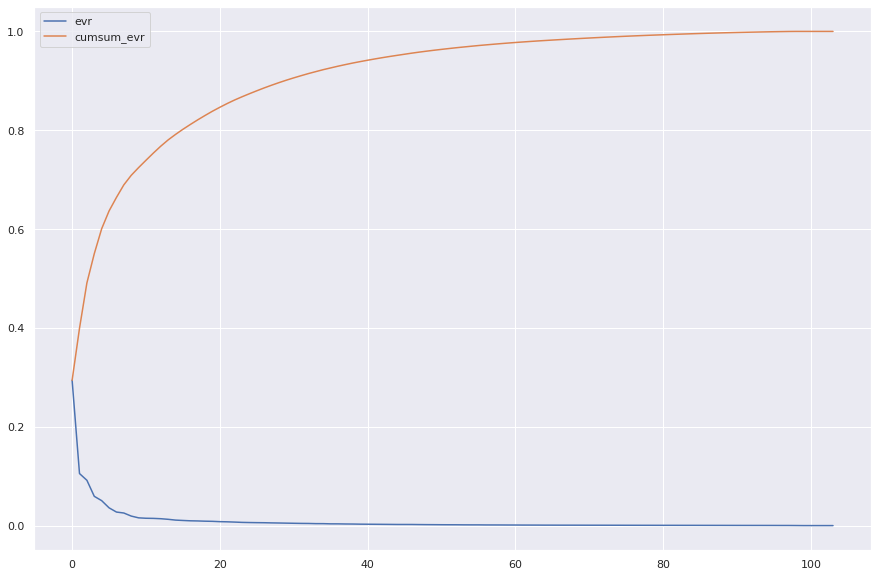

In [18]:
plot_data = pd.DataFrame({'evr': model.explained_variance_ratio_, 'cumsum_evr': np.cumsum(model.explained_variance_ratio_)}).stack() #this is the plot we want to do, which is an attribute of the model instance. Each of the points is our principal components. The first one explains 70% of our variability. First and second would be enough
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(y = plot_data.values, x = plot_data.index.get_level_values(0), hue=plot_data.index.get_level_values(1)) #If the first one is near 1 then we have too many features

In [19]:
print(model.explained_variance_ratio_)

[2.94028334e-01 1.05305798e-01 9.16788351e-02 5.92007271e-02
 5.04757669e-02 3.59553705e-02 2.74046337e-02 2.54508250e-02
 1.92601609e-02 1.56712496e-02 1.48367658e-02 1.45872174e-02
 1.39135261e-02 1.26991688e-02 1.11137877e-02 1.03645436e-02
 9.69350388e-03 9.38862861e-03 8.90951885e-03 8.61463955e-03
 7.95528364e-03 7.62283464e-03 7.10174877e-03 6.49163301e-03
 6.18500363e-03 5.95614043e-03 5.79379248e-03 5.46766000e-03
 5.22523289e-03 4.95425549e-03 4.68205070e-03 4.43358671e-03
 4.30734335e-03 3.96253514e-03 3.92391063e-03 3.53233289e-03
 3.49657990e-03 3.25298037e-03 3.13752809e-03 2.88457164e-03
 2.76854925e-03 2.66604261e-03 2.53611086e-03 2.41314371e-03
 2.27077103e-03 2.25553519e-03 2.23030781e-03 2.05982544e-03
 1.93198400e-03 1.85420756e-03 1.73322015e-03 1.68062540e-03
 1.64333190e-03 1.51400559e-03 1.46748734e-03 1.46090853e-03
 1.31245276e-03 1.27935208e-03 1.24940190e-03 1.17186430e-03
 1.15224888e-03 1.05827556e-03 1.02963437e-03 9.99813567e-04
 9.22140182e-04 9.048317

###Plotting all the PCS


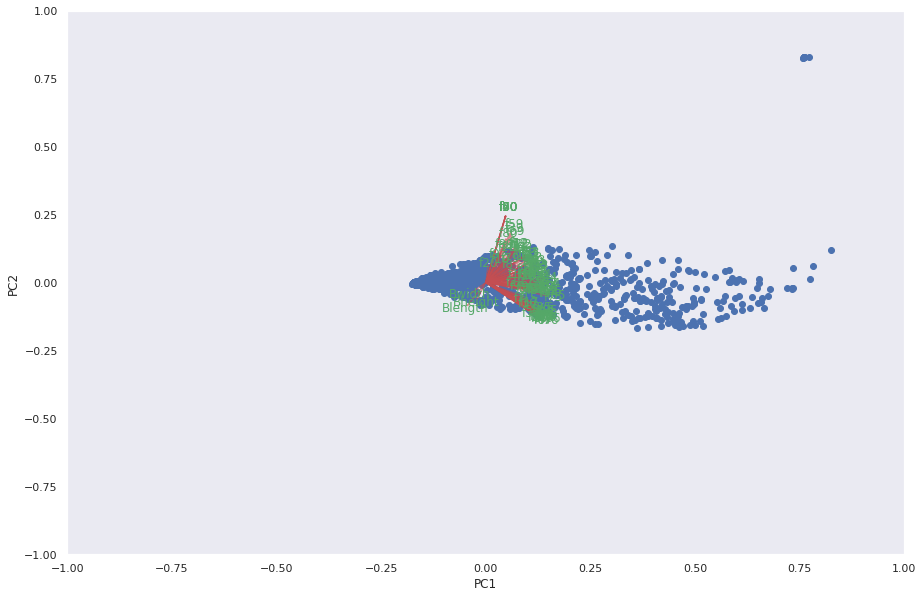

In [20]:
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, df_clean.columns[i], color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

#Call the function. Use only the 2 PCs.
myplot(data_reduced[:,0:2],np.transpose(model.components_[0:2, :]))
plt.show()

In [21]:
pcscores = pd.DataFrame(data_reduced)
loadings = pd.DataFrame(model.components_, columns=df_clean.columns)
loadings.index = ['PC'+str(i+1) for i in range(len(pcscores.columns))]

In [22]:
fig, ax = plt.subplots(figsize=(50,50))
sns.heatmap(loadings.transpose(), center=0, linewidths=0.5, 
                 cmap="bone", vmin=-1, vmax=1, annot=True, ax=ax)

Output hidden; open in https://colab.research.google.com to view.

In [23]:
fig, ax = plt.subplots(figsize=(50,50))
sns.heatmap(loadings.transpose(), center=0, linewidths=0.1, 
                 cmap="bone", vmin=-1, vmax=1, annot=True, ax=ax)

Output hidden; open in https://colab.research.google.com to view.

In [24]:
# number of components
n_pcs= model.components_.shape[0]

# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]

initial_feature_names = df_clean.columns
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
df = pd.DataFrame(dic.items())

print(df)

         0    1
0      PC0  f65
1      PC1  f40
2      PC2  f78
3      PC3  f93
4      PC4  f16
..     ...  ...
99    PC99  f50
100  PC100  f60
101  PC101  f30
102  PC102  f40
103  PC103  f70

[104 rows x 2 columns]


#Preparing Data

In [25]:
# Select the (independant) features that we are going to use to train the model
data_train = df_clean.loc[:,'hoys':'Bheight']
print(data_train)

      hoys  Bwidth  Blength  Bheight
0     4382      40       17       67
1     6324       1        1        1
2     6324       1        1        1
3     6324       1        1        1
4     6324       1        1        1
...    ...     ...      ...      ...
1505  5697      41       18       14
1506  5365      24       28       87
1507  5289      16       28       39
1508  4883      15       10       49
1509  5221      39       50      148

[1510 rows x 4 columns]


#Regression

In [26]:
# Load and instantiate a StandardSclaer 
from sklearn.preprocessing import StandardScaler
import joblib

scalerX = StandardScaler()
scalerX.fit(data_train)

joblib.dump(scalerX, 'scalerX.pkl')

# Transform into a categorical variable
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

# Apply the scaler to our X-features
x_scaled = scalerX.transform(data_train)
x_scaled

array([[-0.84430589,  0.8099713 , -1.19908781, -0.26427981],
       [ 1.42210337, -2.41077211, -2.17100587, -1.88110767],
       [ 1.42210337, -2.41077211, -2.17100587, -1.88110767],
       ...,
       [ 0.2142076 , -1.17202465, -0.53089415, -0.95020678],
       [-0.25961431, -1.25460781, -1.62430196, -0.70523286],
       [ 0.13484827,  0.72738814,  0.80549318,  1.72000893]])

In [27]:
# Define the dependant variable / target to predict 
y_reg = df_clean.loc[:,'f1':'f100'] # NUMBER OF VALUES YOU ARE PREDICTING, THIS NUMBER SHOULD MATCH THE FINAL LAYER 
y_reg



,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99,f100
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,0,0,0,1,0,1
2,1,1,1,1,0,0,0,1,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,0,0,0,1,1,0
3,1,1,1,1,0,0,0,1,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,0,0,0,1,1,1
4,1,1,1,1,0,0,0,1,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1505,0,1,1,1,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1506,1,1,1,0,0,0,0,1,1,1,0,0,0,0,1,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0
1507,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1508,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [28]:
from sklearn.preprocessing import MinMaxScaler
scalerY = MinMaxScaler()
scalerY.fit(y_reg)


joblib.dump(scalerY, 'scalerY.pkl')

#In this case it makes sense to use MinMax scaling because the wage seems like a relative range
# Apply the scaler to our Y-features
y_scaled = scalerY.transform(y_reg)# TRY .TRANSFORM

print(y_scaled.shape)

(1510, 100)


In [29]:
print("y_scaled", np.amin(y_scaled), np.amax(y_scaled))
y_scaled

y_scaled 0.0 1.0


array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 1., 1., ..., 1., 0., 1.],
       [1., 1., 1., ..., 1., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.]])

In [30]:
#Split the data using the train_test_split module. We keep 20% of the data for testing and use 80% to train the model
# Random state defined with an arbitrary number for reproducibility

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test, df_clean_train, df_clean_test = train_test_split(x_scaled, y_scaled, df_clean, test_size = 0.2, random_state = 42)

In [31]:
print("TRAIN", "input", X_train.shape, "output", y_train.shape)
print("TEST", "input", X_test.shape, "output", y_test.shape)

TRAIN input (1208, 4) output (1208, 100)
TEST input (302, 4) output (302, 100)


In [32]:
# Import and instantiate the baseline model
from sklearn.linear_model import LinearRegression
SKmodel = LinearRegression()

# Model training
SKmodel.fit(X_train, y_train)

# Model performance on the test-set / This score is R^2
print(SKmodel.score(X_test, y_test))

0.19582908611856828


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


In [33]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, SKmodel.predict(X_test)))

0.10237996131042638


#Train Model

In [34]:
# Instantiate a sequential model
model = tf.keras.models.Sequential()
n_cols = x_scaled.shape[1]  

# Add 2 dense layers of 50 and 32 neurons each
model.add(tf.keras.layers.Dense(50, input_shape=(n_cols,), activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='relu'))
#model.add(tf.keras.layers.Dense(5, activation='relu'))
# Add a dense layer with 1 value output
model.add(tf.keras.layers.Dense(100, activation= "sigmoid")) # NUMBER NEED TO MATCH THE NUMBER OF VALUES TO BE PREDICTED  ALSO TRY LINEAR INSTED OF SIGMOID REGRESSIONM
  
# Compile your model 
model.compile(optimizer = "adam", loss = "mean_squared_error")

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                250       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_2 (Dense)              (None, 100)               1100      
Total params: 1,860
Trainable params: 1,860
Non-trainable params: 0
_________________________________________________________________


In [36]:
# Fit your model to the training data for 200 epochs
#we assign this to history variable so we can plot the training data

history = model.fit(X_train,y_train,epochs=50, validation_split=0.2)

Epoch 1/50
31/31 [==============================] - 1s 6ms/step - loss: 0.2432 - val_loss: 0.2321
Epoch 2/50
31/31 [==============================] - 0s 3ms/step - loss: 0.2156 - val_loss: 0.1887
Epoch 3/50
31/31 [==============================] - 0s 3ms/step - loss: 0.1663 - val_loss: 0.1364
Epoch 4/50
31/31 [==============================] - 0s 3ms/step - loss: 0.1290 - val_loss: 0.1137
Epoch 5/50
31/31 [==============================] - 0s 3ms/step - loss: 0.1150 - val_loss: 0.1068
Epoch 6/50
31/31 [==============================] - 0s 3ms/step - loss: 0.1095 - val_loss: 0.1038
Epoch 7/50
31/31 [==============================] - 0s 3ms/step - loss: 0.1065 - val_loss: 0.1021
Epoch 8/50
31/31 [==============================] - 0s 3ms/step - loss: 0.1045 - val_loss: 0.1009
Epoch 9/50
31/31 [==============================] - 0s 3ms/step - loss: 0.1029 - val_loss: 0.1001
Epoch 10/50
31/31 [==============================] - 0s 3ms/step - loss: 0.1016 - val_loss: 0.0993
Epoch 11/50
31/31 [

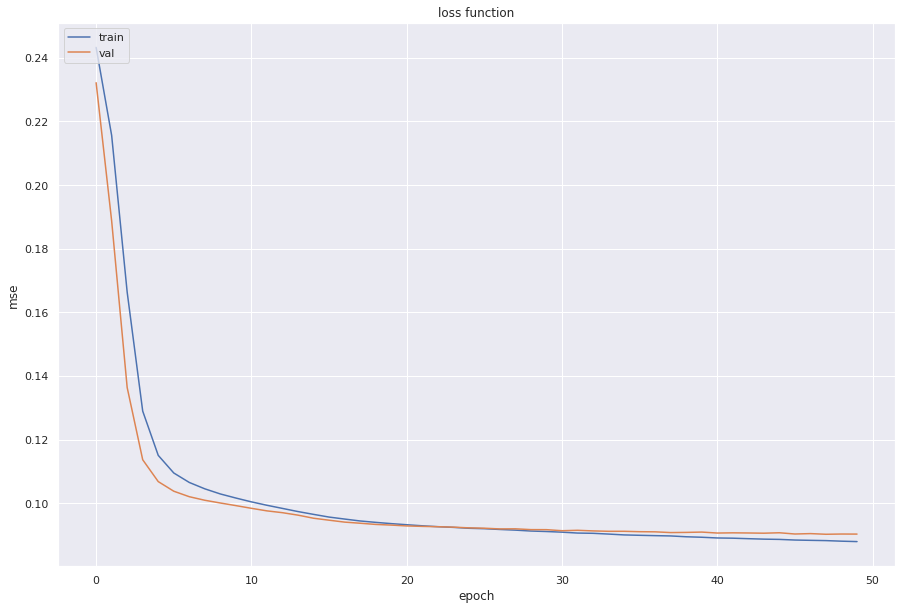

In [37]:
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss function')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


##Evaluate Model on Test Data

In [38]:
# Evaluate your model accuracy on the test data
loss_test = model.evaluate(X_test,y_test)

# Print accuracy
print('mse_test:', loss_test)

10/10 [==============================] - 0s 2ms/step - loss: 0.0940
mse_test: 0.0939900204539299


In [39]:
model.save('DirectSun03twisted.h5')

#Plot Error

In [40]:
def plot_comparison(x_val, pred, truth, xlab, ylab):
  fig, ax1 = plt.subplots()
  ax1.plot(x_val, truth, color = "red", label = "truth",linestyle='None', marker = "o", markersize = 5)
  ax1.plot(x_val, pred, color = "blue", label = "pred",linestyle='None', marker = "o", markersize = 4, alpha = 0.5)

  ax1.set_xlabel(xlab)
  ax1.set_ylabel(ylab)
  ax1.legend()
  fig.set_figheight(10)
  fig.set_figwidth(20)
  plt.title('Prediction Comparison')
  plt.show()

In [41]:
# We can also inspect our results visually
y_pred = scalerY.inverse_transform(model.predict(X_test))
y_test = scalerY.inverse_transform(y_test)
y_test.shape
y_pred.shape

#data_test["y_predANN"] = y_pred[:,:100]
#data_test["truth"] = y_test[:,1]
#sns.scatterplot(x = "y_predANN", y = "truth", data = data_test)

(302, 100)

#Save Model

In [42]:
#model.save('COM_VISION-ML_REGRESSION_MODEL-V03.h5')

In [43]:
import numpy as np
# File path
filepath = '/content/gdrive/MyDrive/S3/DATA ENCODING/AIA - DATA ENCODING  G06/01_WORKING FILES/Model '


# Load the model
#model = tf.keras.models.load_model(filepath, compile = True)

# Im giving it the values of the first row just to check what happens

#raw x values: 18.896986 	87.101372 	33.423961 	69.709425 	905684.79 	19016.096966 	2294.836551 	45.302281
#raw y values: 9020.00 	0.1443 	-3999265.33

#fit.transformed x values - [ 1.58656104  1.57439087  1.69183861  1.47684253  1.76488417  0.67673085   -0.67673085  1.98552519]
#fit.transformed y values[ 0.62423916 -0.07021049 -1.732858  ]



# : the txt file from gabriella would go here instead

#samples_to_predict = [[18.896986, 87.101372, 33.423961, 69.709425, 905684.79, 19016.096966, 2294.836551, 45.302281]]
#array_samples = np.array(samples_to_predict)

#uncomment this in case we want multiple block predictions at once
#length = len(samples_to_predict)
#reshaped = array_samples.reshape(length,8)

#scaled_samples = scalerX.fit_transform(array_samples)

# Generate predictions for samples
#predictions = model.predict(scaled_samples)


# Decode them back
#NOTE THAT e+03 means the comma moves 3 times to the right, while e-01 it moves 1 time to the left. Keep that in mind when interpreting the output!
#final_predictions = scalerY.inverse_transform(predictions)
#print(final_predictions)

#Save the txt for grasshopper to read
#np.savetxt("prediction.txt", final_predictions)
#print("text Saved")